In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random

In [3]:
data=pd.read_csv("train.csv")
data.head()

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305


In [4]:
age=data['experience']
salary=data['salary']
salary.head()
# plt.plot_date(age,salary)

0     6to10
1    10to15
2    15to25
3    10to15
4      3to6
Name: salary, dtype: object

In [5]:
rand_salarys=[]
for i in range(len(salary)):
    temp=[int(x) for x in salary[i].split("to")]
    est_salary=random.uniform(temp[0],temp[1])
    rand_salarys.append(est_salary)
data["est_salary"]=rand_salarys 


In [6]:
rand_age=[]
for i in range(len(age)):
    use,cache=[x for x in age[i].split()]
    temp=[int(x) for x in use.split("-")]
    est_age=random.uniform(temp[0],temp[1])
    rand_age.append(est_age)
data["est_age"]=rand_age
data.head()

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded,est_salary,est_age
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687,9.118706,5.945702
1,1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458,13.784571,15.235387
2,2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195,15.943229,8.147489
3,3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313,10.026345,7.496245
4,4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305,5.756364,2.096719


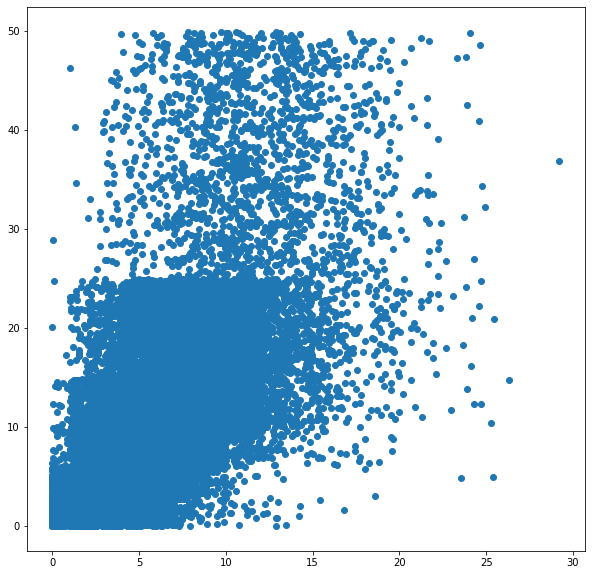

In [7]:
line_x=data["est_age"]
line_y=data["est_salary"]
from matplotlib import rcParams
rcParams['figure.figsize']=10,10
plt.scatter(line_x,line_y)

In [20]:
avr_age=sum(rand_age)/len(data)
avr_salar=sum(rand_salarys)/len(data)
mtx_ageSalary=[]
for i in range(len(data)):
    temp_mtx=[rand_age[i]-avr_age,rand_salarys[i]-avr_salar]
    mtx_ageSalary.append(temp_mtx)
mtx_Tran_age=[]
mtx_Tran_salary=[]
for i in range(len(data)):
    mtx_Tran_age.append(mtx_ageSalary[i][0])
    mtx_Tran_salary.append(mtx_ageSalary[i][1])


In [23]:
cov_1=[]
cov_2=[]
for i in range(len(data)):
    aa=mtx_Tran_age[i]*mtx_ageSalary[i][0]
    ass=mtx_Tran_age[i]*mtx_ageSalary[i][1]
    cov_1.append(aa)
    cov_2.append(ass)
cov_a=sum(cov_1)/len(data)
cov_b=sum(cov_2)/len(data)
cov_mtx=[[cov_a,cov_b],[cov_b,cov_a]]
print(cov_mtx)

[[15.405674809348433, 23.85370638024925], [23.85370638024925, 15.405674809348433]]
